In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('EURO_VALUE.xlsx')
df.columns.values[0] = 'date'
df.columns.values[1] = 'Currency'
df['date'] = df['date'].astype(str)
df['Currency'] = df['Currency'].astype(float)
def convert_date(date_str):
    year, month = date_str.split('. ')
    month_mapping = {
        'январь': '01',
        'февраль': '02',
        'март': '03',
        'апрель': '04',
        'май': '05',
        'июнь': '06',
        'июль': '07',
        'август': '08',
        'сентябрь': '09',
        'октябрь': '10',
        'ноябрь': '11',
        'декабрь': '12'
    }
    month_number = month_mapping.get(month.lower(), '00')
    return f'01.{month_number}.{year}'
df['date'] = df['date'].apply(convert_date)
df['date'] = pd.to_datetime(df['date'])
mask_1 = ((df['date'] >= '2009-01-01') & (df['date'] <= '2009-12-31'))
mask_2=  ((df['date'] >= '2021-01-01') & (df['date'] <= '2021-12-31'))
df_1 = df[mask_1]
df_2 = df[mask_2]
def hurst_exponent(ts):
    ts = np.array(ts)
    N = len(ts)
    mean_ts = np.mean(ts)
    deviations = ts - mean_ts
    cumulative_deviations = np.cumsum(deviations)
    R = np.max(cumulative_deviations) - np.min(cumulative_deviations)
    S = np.std(ts)
    if S == 0:
        return np.nan  # Избегаем деления на ноль
    rs = R / S
    log_rs = np.log(rs)
    log_n = np.log(N)
    hurst = round(log_rs / log_n, 3)
    return hurst
hurst_value = hurst_exponent(df_1['Currency'])
print(f"Показатель Херста для временного ряда 01.01.2009-31.12.2009: {hurst_value}")
hurst_value = hurst_exponent(df_2['Currency'])
print(f"Показатель Херста для временного ряда 01.01.2021-31.12.2021: {hurst_value}")

/tmp/ipykernel_69311/2085063587.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Показатель Херста для временного ряда 01.01.2009-31.12.2009: 0.511
Показатель Херста для временного ряда 01.01.2021-31.12.2021: 0.661


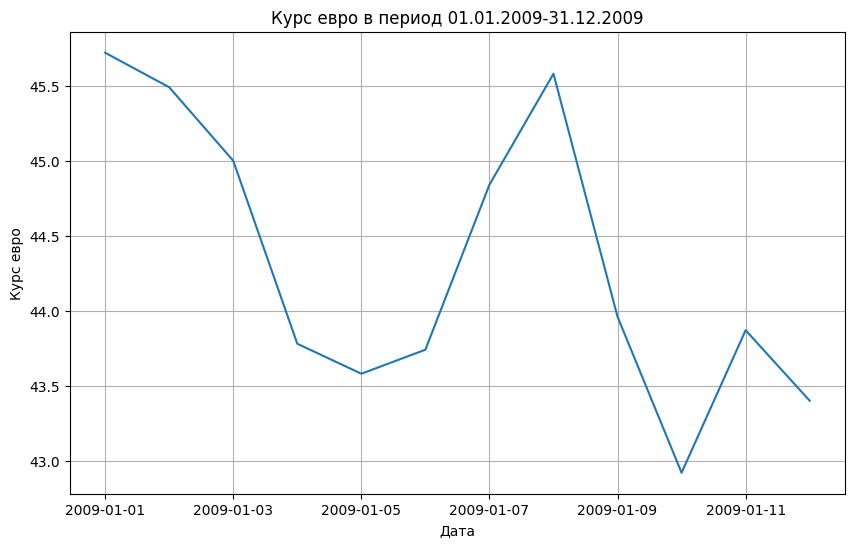

In [2]:
plt.figure(figsize=(10, 6))
plt.plot(df_1['date'],df_1['Currency'])
plt.title('Курс евро в период 01.01.2009-31.12.2009')
plt.xlabel('Дата')
plt.ylabel('Курс евро')
plt.grid()
plt.show()

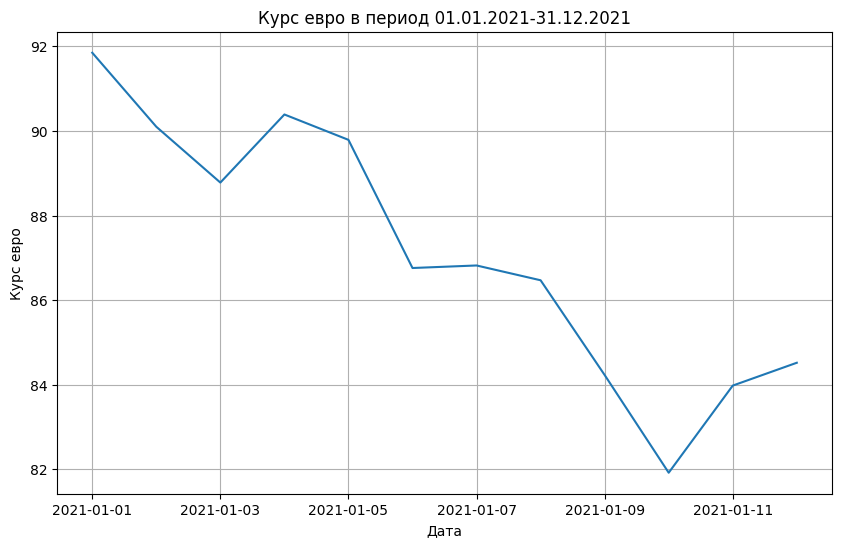

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(df_2['date'],df_2['Currency'])
plt.title('Курс евро в период 01.01.2021-31.12.2021')
plt.xlabel('Дата')
plt.ylabel('Курс евро')
plt.grid()
plt.show()